In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv(r"C:\Users\hc\Documents\GitHub\AI-Q2-learning-resources\DLAssignments\data\Car Price Prediction\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data = df.drop(['car_ID', 'price', 'CarName'], 1)

In [5]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [6]:
data.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26


In [7]:
data.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

# One Hot Encoding for Categorical Variables

In [8]:
fueltype_cat = pd.get_dummies(data.fueltype)


aspiration_cat = pd.get_dummies(data.aspiration)


doornumber_cat = pd.get_dummies(data.doornumber)

carbody_cat = pd.get_dummies(data.carbody)


drivewheel_cat = pd.get_dummies(data.drivewheel)

enginelocation_cat = pd.get_dummies(data.enginelocation)

enginetype_cat = pd.get_dummies(data.enginetype)


cylindernumber_cat = pd.get_dummies(data.cylindernumber)

fuelsystem_cat = pd.get_dummies(data.fuelsystem)

In [9]:
# merging all one hot encoded data together

one_hot_encoded_data = pd.concat([fueltype_cat, aspiration_cat, doornumber_cat, carbody_cat, drivewheel_cat, enginelocation_cat, enginetype_cat, cylindernumber_cat, fuelsystem_cat], 1)

one_hot_encoded_data.shape

(205, 38)

In [10]:
# Removing all categorical columns from data

data = data.drop(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], 1)


In [11]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [12]:
targets = df['price']

In [13]:
# 70 percent of 205 = 143
train_data = data.iloc[:143] ############# 0 based so end at 143 @!%$#&^$&!@$
train_targets = targets.iloc[:143]


# 30 percent for test
# 205 - 143 = 62
test_data = data.iloc[143:]
test_targets = targets.iloc[143:]

# cross checking
print('Data, Targets', end='\n\n')
print('TRAIN')
print(train_data.shape)
print(train_targets.shape)
print('#'*15)


print('TEST')
print(test_data.shape)
print(test_targets.shape)

Data, Targets

TRAIN
(143, 14)
(143,)
###############
TEST
(62, 14)
(62,)


# Normalization (for numerical data --- based on training data)

In [14]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data-=mean
test_data /= std

# concatenating numerical and one hot encoded data

In [15]:
train_data = pd.concat([train_data, one_hot_encoded_data.iloc[:143]], 1)
test_data = pd.concat([test_data, one_hot_encoded_data.iloc[143:]], 1)

In [16]:
train_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1.723580,-1.493769,-0.351097,-0.793095,-1.776147,-0.034247,-0.002375,0.549668,-1.832037,-0.242842,0.087964,-0.378610,-0.536464,-0.471101,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1.723580,-1.493769,-0.351097,-0.793095,-1.776147,-0.034247,-0.002375,0.549668,-1.832037,-0.242842,0.087964,-0.378610,-0.536464,-0.471101,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.024448,-0.602725,-0.174519,-0.203063,-0.387386,0.442142,0.464686,-2.304006,0.572858,-0.242842,1.098981,-0.378610,-0.821648,-0.609717,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.849566,0.197705,0.222780,0.091953,0.345572,-0.399766,-0.448207,-0.461761,0.359766,0.035147,-0.123644,0.674721,-0.108689,-0.055253,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.849566,0.137295,0.222780,0.176243,0.345572,0.443874,0.125005,-0.461761,0.359766,-0.520832,0.182013,0.674721,-0.964240,-1.164182,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.849566,0.197705,0.274281,0.134098,-0.117349,-0.105272,0.125005,-0.461761,0.359766,-0.381837,0.064452,0.674721,-0.821648,-0.748333,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,-0.024448,1.103852,1.407319,2.283502,0.885645,0.478520,0.125005,-0.461761,0.359766,-0.381837,0.064452,0.674721,-0.821648,-0.748333,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,-0.024448,1.103852,1.407319,2.283502,0.885645,0.669076,0.125005,-0.461761,0.359766,-0.381837,0.064452,0.674721,-0.821648,-0.748333,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,-0.024448,1.103852,1.407319,2.283502,0.962799,0.897742,0.018855,-0.678496,0.359766,-0.437435,0.769813,0.674721,-1.106832,-1.441414,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,-0.898462,0.152397,0.340498,0.808421,-0.541692,0.840576,0.018855,-0.678496,0.359766,-0.798821,1.240053,0.674721,-1.249424,-1.164182,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# cross checking shapes

In [17]:
print(train_data.shape)
print(test_data.shape)

(143, 52)
(62, 52)


In [18]:
# BUILDING MODEL
from keras import layers
from keras import models

def build_model():
    model = models.Sequential()

    model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))

    model.add(layers.Dense(8, activation='relu'))

    model.add(layers.Dense(6, activation='relu'))

    model.add(layers.Dense(1))
    
    # COMPILING
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

Using TensorFlow backend.


# K Fold Cross Validation

In [19]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'FOLD NUMBER {i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=32, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

FOLD NUMBER 0
FOLD NUMBER 1
FOLD NUMBER 2
FOLD NUMBER 3


In [20]:
all_scores

[14143.875, 13402.599609375, 13387.1640625, 15419.6943359375]

In [21]:
np.mean(all_scores)

14088.333251953125

In [22]:
num_epochs = 1500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [23]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


# https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

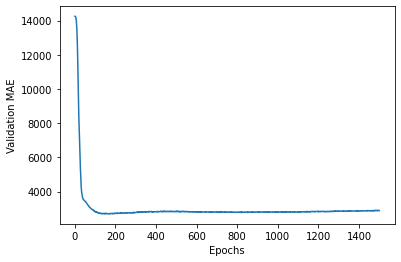

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
df.describe()

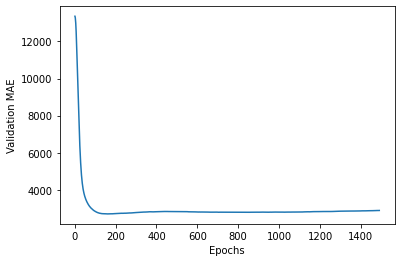

In [25]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


# TRAINING FINAL MODEL

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=90, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32)

In [ ]:
results

In [ ]:

### accuracy metric is used for classification problems not for regression

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=100, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32)

In [ ]:
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=120, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=300, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=500, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results


### TARGET IS NOW A VALUE BELOW 2764

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=1000, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=800, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=700, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results
### TARGET IS NOW A VALUE BELOW 2705

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=750, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

#DAMNNNNN

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=780, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

# GO BACK

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=760, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

## go back

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=755, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=750, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [ ]:
model = build_model()

model.fit(train_data, train_targets,
epochs=750, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

In [26]:
model = build_model()

model.fit(train_data, train_targets,
epochs=750, batch_size=32, verbose=0)


results = model.evaluate(test_data, test_targets, batch_size=32) 
results

62/62 [==============================] - 0s 290us/step


[15001454.161290323, 2862.47607421875]